<a href="https://colab.research.google.com/github/sungyun0701/study/blob/main/machine_learning/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
## 구글 드라이브 마운트 // 옆에 파일에서 확인해서 경로 확인하면 됨

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


타이타닉 생존자를 예측하는 기계 학습
타이타닉의 생존자를 예측하는 것은 감독되는 분류 기계 학습 문제로, 승객을 생존자로 분류하거나 생존하지 못한 것으로 분류합니다.
회귀가 아님!!

# **1.Importing Libraries and Packages**

In [38]:
import numpy as np #넘파이(Numpy)는 Python에서 벡터, 행렬 등 수치 연산을 수행하는 선형대수(Linear algebra) 라이브러리
import pandas as pd #Python Data Analysis Library
import seaborn as sns # 데이터 시각화하는 라이브러리
from matplotlib import pyplot as plt # 이것도 데이터 시각화 라이브러리

sns.set_style("whitegrid")
%matplotlib inline 
#notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해줌

import warnings
warnings.filterwarnings("ignore") #경고메세지 끄는것// warnings.filterwarnings(action='ignore') 이렇게 쓰는 곳도 있네..

import os #Operating System의 약자로서 운영체제에서 제공되는 여러 기능을 파이썬에서 수행할 수 있게 해줌
          #예를 들어, 파일을 복사하거나 디렉터리를 생성하고 특정 디렉터리 내의 파일 목록을 구하고자 할 때 사용
DIR_PATH = "/content/drive/MyDrive/Colab Notebooks/data/titanic/"
print(os.listdir(DIR_PATH))

['.ipynb_checkpoints', 'gender_submission.csv', 'test.csv', 'train.csv']


# **2.Loding and Viewing Data Set**

In [39]:
training = pd.read_csv(DIR_PATH+'train.csv')
testing = pd.read_csv(DIR_PATH+'test.csv')

In [40]:
training.head() # 데이터의 처음 n줄의 데이터를 출력. default=5

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
testing.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [41]:
# 데이터가 복잡하므로 머신러닝 모델에 쓰기 위해 사전 처리
print(training.keys())
print(testing.keys())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [42]:
types_train = training.dtypes
num_values = types_train[(types_train == float)]

print("These are numerical features:")
print(num_values)

These are numerical features:
Age     float64
Fare    float64
dtype: object


In [43]:
training.describe()
# age와 fare만 실제 값??

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# **3.Dealing with Nan Values(Imputation)**

데이터 집합에 Nan값이 있으면 모델을 훈련하는데 방해가 되므로 Nan값을 다른 값으로 채워야 한다.

In [44]:
def null_table(training, testing):
  print("Training Data Frame")
  print(pd.isnull(training).sum())
  print("")
  print("Testing Data Frame")
  print(pd.isnull(testing).sum())

null_table(training, testing)

Training Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Testing Data Frame
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Cabin은 실측값이 많고 Ticket은 유용한 값이 아니므로 모델의 성능에 영향에 미치지 않게 삭제를 한다.

In [45]:
training.drop(labels = ["Cabin", "Ticket"], axis = 1, inplace = True)
 #axis: 좌표축 y축에 출력되는 라벨 문자크기
testing.drop(labels = ["Cabin", "Ticket"], axis = 1, inplace = True)

null_table(training, testing)

Training Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

Testing Data Frame
PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64


Age열의 분포를 통해 대칭인지 편향이 되었는지 확인한다. 이것을 통해 Nan값의 대체값을 결정하는데 도움을 준다.

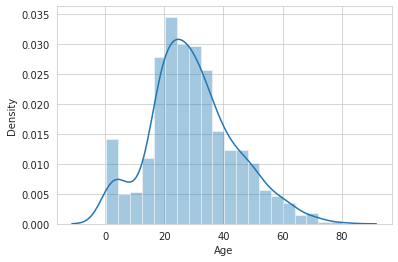

In [46]:
copy = training.copy()
copy.dropna(inplace = True)
sns.distplot(copy["Age"])

위 그래프를 보고 Null값을 무엇을 채울지 결정을 한다. 여기서는 중위수로 채운다.

In [47]:
training["Age"].fillna(training["Age"].median(), inplace = True) #inplace=True 하면 바로 저장까지 되는것
testing["Age"].fillna(testing["Age"].median(), inplace = True)
training["Embarked"].fillna("S", inplace = True)
testing["Fare"].fillna(testing["Fare"].median(), inplace = True)

null_table(training, testing)

Training Data Frame
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

Testing Data Frame
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [ ]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [ ]:
testing.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


# **4,Plotting and Visualizing Data**

## Gender

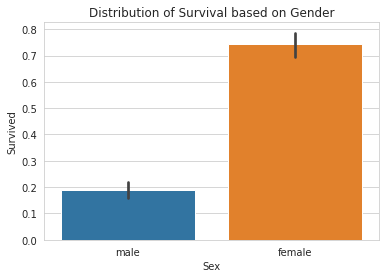

Total people survived is 342
Proportion of Females who survived : 0.6812865497076024
Proportion of Males who survived : 0.31871345029239767


In [48]:
sns.barplot(x="Sex", y = "Survived", data = training)
plt.title("Distribution of Survival based on Gender")
plt.show()

total_survived_females = training[training.Sex == "female"]["Survived"].sum()
total_survived_males = training[training.Sex == "male"]["Survived"].sum()

print("Total people survived is " + str(total_survived_females + total_survived_males))
print("Proportion of Females who survived :", end = " ")
print(total_survived_females/(total_survived_females+total_survived_males))
print("Proportion of Males who survived :",end = " ")
print(total_survived_males/(total_survived_females+total_survived_males))


## Class

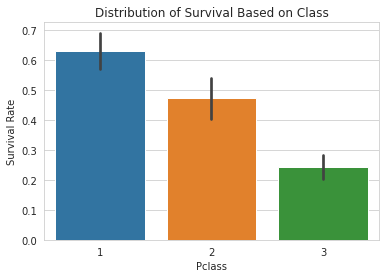

Total people survived is : 342
Proportion of Class 1 Passengers who servived : 0.39766081871345027
Proportion of Class 2 Passengers who survived : 0.2543859649122807
Proportion of Class 3 Passengers who survived :0.347953216374269


In [49]:
sns.barplot(x="Pclass", y = "Survived", data = training)
plt.ylabel("Survival Rate")
plt.title("Distribution of Survival Based on Class")
plt.show()

total_survived_one = training[training.Pclass == 1]["Survived"].sum()
total_survived_two = training[training.Pclass == 2]["Survived"].sum()
total_survived_three = training[training.Pclass ==3]["Survived"].sum()
total_survived_class = total_survived_one+total_survived_two+total_survived_three

print("Total people survived is : " + str(total_survived_class))
print("Proportion of Class 1 Passengers who servived : ", end="")
print(total_survived_one/total_survived_class)
print("Proportion of Class 2 Passengers who survived : ", end="")
print(total_survived_two/total_survived_class)
print("Proportion of Class 3 Passengers who survived :", end= "")
print(total_survived_three/total_survived_class)

Text(0.5, 1.0, 'Survival Rates Based on Gender and Class')

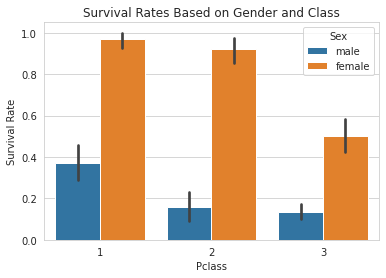

In [50]:
sns.barplot(x="Pclass", y = "Survived", hue = "Sex", data = training)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")

Text(0.5, 1.0, 'Survival Rates Based on Gender and Class')

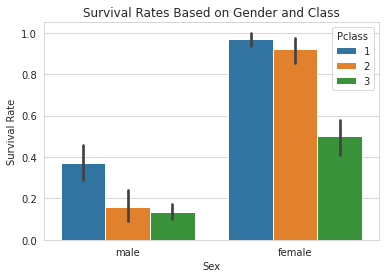

In [51]:
sns.barplot(x="Sex",y="Survived", hue="Pclass", data = training)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")

## Age

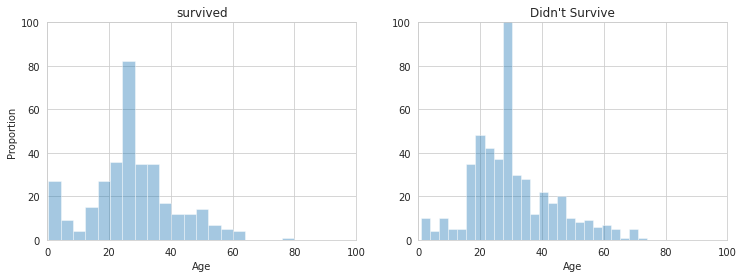

In [52]:
survived_ages = training[training.Survived ==1]["Age"]
not_survived_ages = training[training.Survived == 0]["Age"]
plt.subplot(1,2,1)
sns.distplot(survived_ages, kde = False)
plt.axis([0,100,0,100])
plt.title("survived")
plt.ylabel("Proportion")
plt.subplot(1,2,2)
sns.distplot(not_survived_ages, kde=False)
plt.axis([0,100,0,100])
plt.title("Didn't Survive")
plt.subplots_adjust(right = 1.7)
plt.show()

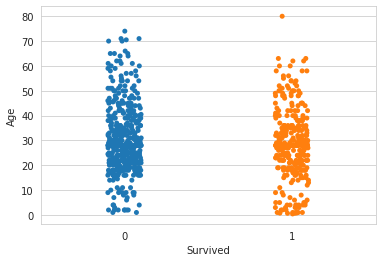

In [53]:
sns.stripplot(x="Survived", y="Age", data = training, jitter=True)

위를 보면 20~30대에 승객이 많이 살아 남는것을 확인할 수 있다.

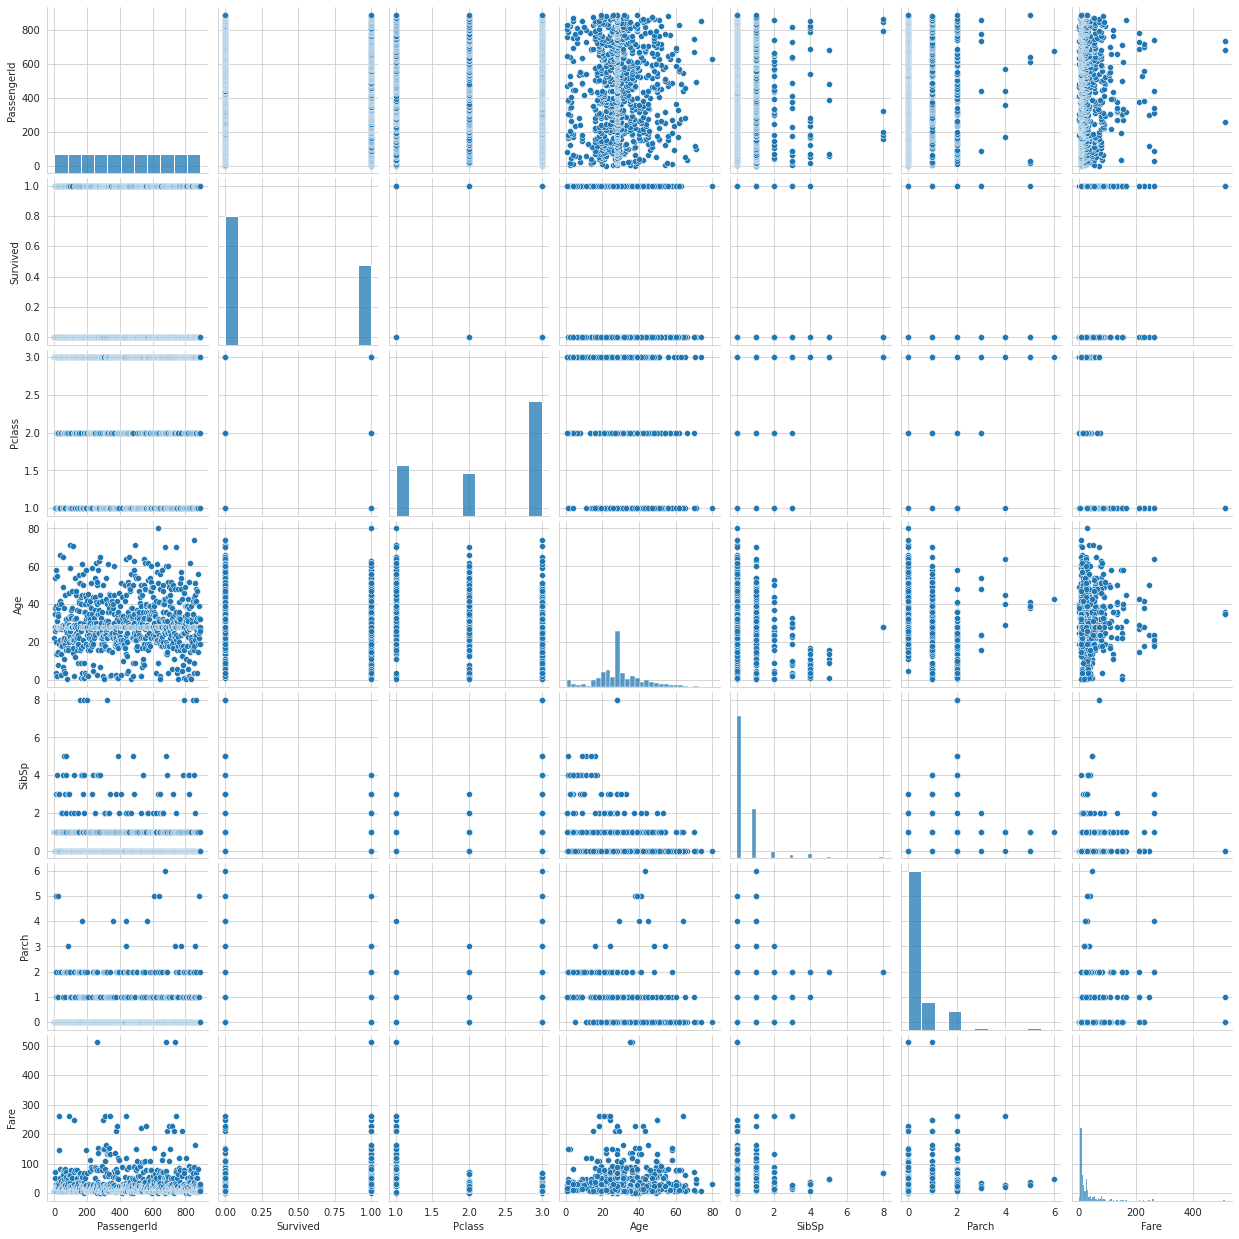

In [54]:
sns.pairplot(training)

# **5.Feature Engineering**

In [55]:
training.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
183,184,1,2,"Becker, Master. Richard F",male,1.0,2,1,39.0000,S
646,647,0,3,"Cor, Mr. Liudevit",male,19.0,0,0,7.8958,S
612,613,1,3,"Murphy, Miss. Margaret Jane",female,28.0,1,0,15.5000,Q
546,547,1,2,"Beane, Mrs. Edward (Ethel Clarke)",female,19.0,1,0,26.0000,S
523,524,1,1,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",female,44.0,0,1,57.9792,C


In [ ]:
testing.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
87,979,3,"Badman, Miss. Emily Louisa",female,18.0,0,0,8.0500,S
376,1268,3,"Kink, Miss. Maria",female,22.0,2,0,8.6625,S
144,1036,1,"Lindeberg-Lind, Mr. Erik Gustaf (Mr Edward Lin...",male,42.0,0,0,26.5500,S
274,1166,3,"Saade, Mr. Jean Nassr",male,27.0,0,0,7.2250,C
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,90.0000,Q


Sex를 이진화를 할 것이다. 1은 여자, 0은 남자로 나타낼 것이다

In [56]:
set(training["Embarked"])

{'C', 'Q', 'S'}

Embarked에는 3가지 값이 있다. 이것들을 숫자로 나타낼 것이다.

In [57]:
from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
le_sex.fit(training["Sex"])

encoded_sex_training = le_sex.transform(training["Sex"])
training["Sex"] = encoded_sex_training
encoded_sex_testing = le_sex.transform(testing["Sex"])
testing["Sex"] = encoded_sex_testing

le_embarked = LabelEncoder()
le_embarked.fit(training["Embarked"])


encoded_embarked_training = le_embarked.transform(training["Embarked"])
training["Embarked"] = encoded_embarked_training

le_embarked.fit(testing["Embarked"])
encoded_embarked_testing = le_embarked.transform(testing["Embarked"])
testing["Embarked"] = encoded_embarked_testing

"""
training.loc[training["Sex"] == "male", "Sex"] = 0
training.loc[training["Sex"] == "female", "Sex"] = 1

training.loc[training["Embarked"] == "S", "Embarked"] = 0
training.loc[training["Embarked"] == "C", "Embarked"] = 1
training.loc[training["Embarked"] == "Q", "Embarked"] = 2

testing.loc[testing["Sex"] == "male", "Sex"] = 0
testing.loc[testing["Sex"] == "female", "Sex"] = 1

testing.loc[testing["Embarked"] == "S", "Embarked"] = 0
testing.loc[testing["Embarked"] == "C", "Embarked"] = 1
testing.loc[testing["Embarked"] == "Q", "Embarked"] = 2
"""

'\ntraining.loc[training["Sex"] == "male", "Sex"] = 0\ntraining.loc[training["Sex"] == "female", "Sex"] = 1\n\ntraining.loc[training["Embarked"] == "S", "Embarked"] = 0\ntraining.loc[training["Embarked"] == "C", "Embarked"] = 1\ntraining.loc[training["Embarked"] == "Q", "Embarked"] = 2\n\ntesting.loc[testing["Sex"] == "male", "Sex"] = 0\ntesting.loc[testing["Sex"] == "female", "Sex"] = 1\n\ntesting.loc[testing["Embarked"] == "S", "Embarked"] = 0\ntesting.loc[testing["Embarked"] == "C", "Embarked"] = 1\ntesting.loc[testing["Embarked"] == "Q", "Embarked"] = 2\n'

In [58]:
training.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",1,28.0,0,0,0.000,2
106,107,1,3,"Salkjelsvik, Miss. Anna Kristine",0,21.0,0,0,7.650,2
242,243,0,2,"Coleridge, Mr. Reginald Charles",1,29.0,0,0,10.500,2
825,826,0,3,"Flynn, Mr. John",1,28.0,0,0,6.950,1
751,752,1,3,"Moor, Master. Meier",1,6.0,0,1,12.475,2


In [ ]:
testing.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
86,978,3,"Barry, Miss. Julia",0,27.0,0,0,7.8792,1
120,1012,2,"Watt, Miss. Bertha J",0,12.0,0,0,15.7500,2
264,1156,2,"Portaluppi, Mr. Emilio Ilario Giuseppe",1,30.0,0,0,12.7375,0
244,1136,3,"Johnston, Master. William Arthur Willie""""",1,27.0,1,2,23.4500,2
137,1029,2,"Schmidt, Mr. August",1,26.0,0,0,13.0000,2


##Creating Synthetic Features

때로는 목표값을 예측하기 위해 합성값을 만드는 것이 유용할 수 있다. 여기서는 SibSp와 Parch를 합성하여 합성값으로 사용할 것이다. 이것은 각 가족 구성원에 대한 구성원 수를 나타낸 것이다.

In [59]:
training["FamSize"] = training["SibSp"] + training["Parch"] + 1
testing["FamSize"] = testing["SibSp"] + testing["Parch"] + 1

In [60]:
training["IsAlone"] = training.FamSize.apply(lambda x : 1 if x == 1 else 0)
testing["IsAlone"] = testing.FamSize.apply(lambda x : 1 if x == 1 else 0)

In [61]:
for name in training["Name"]:
  training["Title"] = training["Name"].str.extract("([A-Za-z]+)\.",expand=True)
  #원하는 문자열 추출 str.extract()//정확하지 않지만 expand=True로 하면 분할된 개별 리스트를 바로 데이터 프레임으로 만들 수 있다.

for name in testing["Name"]:
  testing["Title"] = testing["Name"].str.extract("([A-Za-z]+)\.",expand=True)

In [62]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2,2,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0,2,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2,2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2,1,1,Mr


In [63]:
titles = set(training["Title"])
print(titles)

{'Miss', 'Sir', 'Col', 'Capt', 'Mr', 'Countess', 'Mrs', 'Major', 'Rev', 'Master', 'Lady', 'Don', 'Dr', 'Mlle', 'Jonkheer', 'Ms', 'Mme'}


In [64]:
title_list = list(training["Title"])
frequency_titles = []

for i in titles :
  frequency_titles.append(title_list.count(i))

print(frequency_titles)

[182, 1, 2, 1, 517, 1, 125, 2, 6, 40, 1, 1, 7, 2, 1, 1, 1]


In [65]:
titles = list(titles)

title_dataframe = pd.DataFrame({"Title" : titles, "Frequency" : frequency_titles})

print(title_dataframe)

       Title  Frequency
0       Miss        182
1        Sir          1
2        Col          2
3       Capt          1
4         Mr        517
5   Countess          1
6        Mrs        125
7      Major          2
8        Rev          6
9     Master         40
10      Lady          1
11       Don          1
12        Dr          7
13      Mlle          2
14  Jonkheer          1
15        Ms          1
16       Mme          1


In [66]:
title_replacements = {"Miss": "Other", "Sir": "Other", "Col": "Other", "Capt": "Other", "Mr": "Other", "Countess": "Other", "Mrs": "Other", "Major": "Other", "Rev": "Other", "Master": "Other", "Lady": "Other", "Don": "Other", "Dr": "Other", "Mlle": "Other", "Jonkheer": "Other", "Ms": "Other", "Mme": "Other"}
training.replace({"Title": title_replacements}, inplace=True)
testing.replace({"Title": title_replacements}, inplace=True)

le_title = LabelEncoder()
le_title.fit(training["Title"])

encoded_title_training = le_title.transform(training["Title"])
training["Title"] = encoded_title_training

le_title.fit(testing["Title"])
encoded_title_testing = le_title.transform(testing["Title"])
testing["Title"] = encoded_title_testing

#Again, here's how to do it manually
"""
training.loc[training["Title"] == "Miss", "Title"] = 0
training.loc[training["Title"] == "Mr", "Title"] = 1
training.loc[training["Title"] == "Mrs", "Title"] = 2
training.loc[training["Title"] == "Master", "Title"] = 3
training.loc[training["Title"] == "Dr", "Title"] = 4
training.loc[training["Title"] == "Rev", "Title"] = 5
training.loc[training["Title"] == "Other", "Title"] = 6

testing.loc[testing["Title"] == "Miss", "Title"] = 0
testing.loc[testing["Title"] == "Mr", "Title"] = 1
testing.loc[testing["Title"] == "Mrs", "Title"] = 2
testing.loc[testing["Title"] == "Master", "Title"] = 3
testing.loc[testing["Title"] == "Dr", "Title"] = 4
testing.loc[testing["Title"] == "Rev", "Title"] = 5
testing.loc[testing["Title"] == "Other", "Title"] = 6
"""

'\ntraining.loc[training["Title"] == "Miss", "Title"] = 0\ntraining.loc[training["Title"] == "Mr", "Title"] = 1\ntraining.loc[training["Title"] == "Mrs", "Title"] = 2\ntraining.loc[training["Title"] == "Master", "Title"] = 3\ntraining.loc[training["Title"] == "Dr", "Title"] = 4\ntraining.loc[training["Title"] == "Rev", "Title"] = 5\ntraining.loc[training["Title"] == "Other", "Title"] = 6\n\ntesting.loc[testing["Title"] == "Miss", "Title"] = 0\ntesting.loc[testing["Title"] == "Mr", "Title"] = 1\ntesting.loc[testing["Title"] == "Mrs", "Title"] = 2\ntesting.loc[testing["Title"] == "Master", "Title"] = 3\ntesting.loc[testing["Title"] == "Dr", "Title"] = 4\ntesting.loc[testing["Title"] == "Rev", "Title"] = 5\ntesting.loc[testing["Title"] == "Other", "Title"] = 6\n'

In [67]:
training.drop("Name",axis = 1, inplace = True)
testing.drop("Name", axis = 1, inplace = True)

In [68]:
training.sample(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
689,690,1,1,0,15.0,0,1,211.3375,2,2,0,0
847,848,0,3,1,35.0,0,0,7.8958,0,1,1,0
249,250,0,2,1,54.0,1,0,26.0000,2,2,0,0
427,428,1,2,0,19.0,0,0,26.0000,2,1,1,0
446,447,1,2,0,13.0,0,1,19.5000,2,2,0,0


In [69]:
testing.sample(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
72,964,3,0,29.0,0,0,7.9250,2,1,1,1
104,996,3,0,16.0,1,1,8.5167,0,3,0,1
46,938,1,1,45.0,0,0,29.7000,0,1,1,1
256,1148,3,1,27.0,0,0,7.7500,1,1,1,1
234,1126,1,1,39.0,1,0,71.2833,0,2,0,1


# **6.Feature Rescaling**

In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

ages_train = np.array(training["Age"]).reshape(-1,1)
fares_train = np.array(training["Fare"]).reshape(-1,1)
ages_test = np.array(testing["Age"]).reshape(-1,1)
fares_test = np.array(testing["Fare"]).reshape(-1,1)

training["Age"] = scaler.fit_transform(ages_train)
training["Fare"] = scaler.fit_transform(fares_train)
testing["Age"] = scaler.fit_transform(ages_test)
testing["Fare"] = scaler.fit_transform(fares_test)

In [ ]:
training.head()

In [ ]:
testing.head()

# **7.Model Fitting, Optimizing, and Predicting**

이제 어떤 모델이 가장 정확도가 높은지 확인하기 위해 다양한 유형의 모델을 적용할 것이다.

In [71]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

모델 성능을 평가힉 위해 sklearn.metrics의 make_scorr와 caracity_score 함수를 사용

In [72]:
from sklearn.metrics import make_scorer, accuracy_score

GridSearch를 교차 검증을 통해 테스트세트에서 예측에 쓸 모델의 최적의 매개변수를 찾을 수 있다.

In [73]:
from sklearn.model_selection import GridSearchCV

**Defining Features in Training/Test Set**

In [74]:
X_train = training.drop(labels=["PassengerId", "Survived"], axis = 1)
y_train = training["Survived"]
X_test = testing.drop("PassengerId",axis = 1)

In [75]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
0,3,1,-0.565736,1,0,-0.502445,2,2,0,0
1,1,0,0.663861,1,0,0.786845,0,2,0,0
2,3,0,-0.258337,0,0,-0.488854,2,1,1,0
3,1,0,0.433312,1,0,0.420730,2,2,0,0
4,3,1,0.433312,0,0,-0.486337,2,1,1,0


**Validation Data Set**

In [76]:
from sklearn.model_selection import train_test_split

X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state=0)

**SVC Model**

In [78]:
svc_clf =  SVC()

parameters_svc = {"kernel":["rbf", "linear"], "probability":[True, False], "verbose":[True, False]}

grid_svc = GridSearchCV(svc_clf, parameters_svc, scoring = make_scorer(accuracy_score))
grid_svc.fit(X_training, y_training)

svc_clf = grid_svc.best_estimator_

svc_clf.fit(X_training, y_training)
pred_svc = svc_clf.predict(X_valid)
acc_svc = accuracy_score(y_valid, pred_svc)

print("The Scre for SVC is "+ str(acc_svc))

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]The Scre for SVC is 0.8100558659217877


**LinearSVC Model**

In [80]:
linsvc_clf = LinearSVC()

parameters_linsvc = {"multi_class": ["ovr", "crammer_singer"], "fit_intercept":[True,False], "max_iter":[100,500,1000,1500]}
grid_linsvc = GridSearchCV(linsvc_clf, parameters_linsvc, scoring=make_scorer(accuracy_score))
grid_linsvc.fit(X_training, y_training)

linsvc_clf = grid_linsvc.best_estimator_

linsvc_clf.fit(X_training, y_training)
pred_linsvc = linsvc_clf.predict(X_valid)
acc_linsvc = accuracy_score(y_valid, pred_linsvc)

print("The Score for LinearSVC is "+ str(acc_linsvc))

The Score for LinearSVC is 0.7932960893854749


**RandomForest Model**

In [84]:
rf_clf = RandomForestClassifier()

parameters_rf = {"n_estimators":[4,5,6,7,8,9,10,15], "criterion":["gini","entropy"], "max_features":["auto","sqrt","log2"], "max_depth":[2,3,5,10], "min_samples_split":[2,3,5,10]}
grid_rf = GridSearchCV(rf_clf, parameters_rf, scoring = make_scorer(accuracy_score))
grid_rf.fit(X_training, y_training)

rf_clf = grid_rf.best_estimator_

rf_clf.fit(X_training, y_training)
pred_rf = rf_clf.predict(X_valid)
acc_rf = accuracy_score(y_valid, pred_rf)

print("The Score for Random Forest is " + str(acc_rf))


The Score for Random Forest is 0.8324022346368715


**LogisiticRegression Model**

In [86]:
logreg_clf = LogisticRegression()

parameters_logreg = {"penalty":["l2"], "fit_intercept":[True,False],"solver":["newton-cg", "lbfgs", "liblinear", "sag", "saga"], 
                     "max_iter":[50,100,200],"warm_start":[True,False]}

grid_logreg = GridSearchCV(logreg_clf, parameters_logreg, scoring = make_scorer(accuracy_score))
grid_logreg.fit(X_training, y_training)

logreg_clf = grid_logreg.best_estimator_

logreg_clf.fit(X_training, y_training)
pred_logreg = logreg_clf.predict(X_valid)
acc_logreg = accuracy_score(y_valid, pred_logreg)

print("The Score for Logistic Regression is "+ str(acc_logreg))


The Score for Logistic Regression is 0.7877094972067039


**KNeighbors Model**

In [87]:
knn_clf = KNeighborsClassifier()

parameters_knn = {"n_neighbors": [3, 5, 10, 15], "weights": ["uniform", "distance"], "algorithm": ["auto", "ball_tree", "kd_tree"], "leaf_size": [20, 30, 50]}

grid_knn = GridSearchCV(knn_clf, parameters_knn, scoring=make_scorer(accuracy_score))
grid_knn.fit(X_training, y_training)

knn_clf = grid_knn.best_estimator_

knn_clf.fit(X_training, y_training)
pred_knn = knn_clf.predict(X_valid)
acc_knn = accuracy_score(y_valid, pred_knn)

print("The Score for KNeighbors is: " + str(acc_knn))

The Score for KNeighbors is: 0.776536312849162


**GaussianNB Model**

In [88]:
gnb_clf = GaussianNB()

parameters_gnb = {}

grid_gnb = GridSearchCV(gnb_clf, parameters_gnb, scoring=make_scorer(accuracy_score))
grid_gnb.fit(X_training, y_training)

gnb_clf = grid_gnb.best_estimator_

gnb_clf.fit(X_training, y_training)
pred_gnb = gnb_clf.predict(X_valid)
acc_gnb = accuracy_score(y_valid, pred_gnb)

print("The Score for Gaussian NB is: " + str(acc_gnb))

The Score for Gaussian NB is: 0.8100558659217877


**DecisionTree Model**

In [89]:
dt_clf = DecisionTreeClassifier()

parameters_dt = {"criterion": ["gini", "entropy"], "splitter": ["best", "random"], "max_features": ["auto", "sqrt", "log2"]}

grid_dt = GridSearchCV(dt_clf, parameters_dt, scoring=make_scorer(accuracy_score))
grid_dt.fit(X_training, y_training)

dt_clf = grid_dt.best_estimator_

dt_clf.fit(X_training, y_training)
pred_dt = dt_clf.predict(X_valid)
acc_dt = accuracy_score(y_valid, pred_dt)

print("The Score for Decision Tree is: " + str(acc_dt))

The Score for Decision Tree is: 0.7932960893854749


**XGBoost Model**

In [90]:
from xgboost import XGBClassifier

xg_clf = XGBClassifier()

parameters_xg = {"objective" : ["reg:linear"], "n_estimators" : [5, 10, 15, 20]}

grid_xg = GridSearchCV(xg_clf, parameters_xg, scoring=make_scorer(accuracy_score))
grid_xg.fit(X_training, y_training)

xg_clf = grid_xg.best_estimator_

xg_clf.fit(X_training, y_training)
pred_xg = xg_clf.predict(X_valid)
acc_xg = accuracy_score(y_valid, pred_xg)

print("The Score for XGBoost is: " + str(acc_xg))

[06:24:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:24:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:24:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:24:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:24:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:24:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:24:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:24:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

# **8.Evaluating Model Performances**

In [92]:
model_performance = pd.DataFrame({"Model":["SVC","Linear SVC", "Random Forest", "Logistic Regression", "K Nearest Neighbors",
                                           "Gaussian Native Bayes", "Decision Tree", "XGBClassifier"], 
                                           "Accuracy":[acc_svc,acc_linsvc, acc_rf, acc_logreg, acc_knn, acc_gnb, acc_dt, acc_xg]})
model_performance.sort_values(by="Accuracy", ascending = False)

,Model,Accuracy
2,Random Forest,0.832402
7,XGBClassifier,0.815642
0,SVC,0.810056
5,Gaussian Native Bayes,0.810056
1,Linear SVC,0.793296
6,Decision Tree,0.793296
3,Logistic Regression,0.787709
4,K Nearest Neighbors,0.776536


# **9.Submission**

In [95]:
submission_predictions = svc_clf.predict(X_test)

submission = pd.DataFrame({"PassengerId":testing["PassengerId"], "Survived": submission_predictions})

submission.to_csv("titanic.csv", index = False)
print(submission.shape)

(418, 2)
